<a href="https://colab.research.google.com/github/erikaad839/pythonprojects/blob/main/COVID19_DATA_ANALYSIS_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

*   List item
*   List item



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style


:Import all required libraries that are needed for data analysis

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [3]:
df.shape

(2125389, 6)

In [4]:
df.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing Maui, Hawaii data for Covid 19

In [5]:
hawaii = df[(df['state']=='Hawaii')& (df['county'] == 'Maui')]

In [6]:
hawaii.head()

,date,county,state,fips,cases,deaths
2425,2020-03-15,Maui,Hawaii,15009.0,1,0.0
2866,2020-03-16,Maui,Hawaii,15009.0,2,0.0
3354,2020-03-17,Maui,Hawaii,15009.0,3,0.0
3916,2020-03-18,Maui,Hawaii,15009.0,3,0.0
4592,2020-03-19,Maui,Hawaii,15009.0,5,0.0


In [7]:
hawaii.shape

(674, 6)

In [8]:
hawaii.tail()

,date,county,state,fips,cases,deaths
2109684,2022-01-13,Maui,Hawaii,15009.0,18437,108.0
2112936,2022-01-14,Maui,Hawaii,15009.0,18773,108.0
2116187,2022-01-15,Maui,Hawaii,15009.0,19729,108.0
2119439,2022-01-16,Maui,Hawaii,15009.0,20485,108.0
2122692,2022-01-17,Maui,Hawaii,15009.0,21008,108.0


In [10]:
#first death in Hawaii
first_hawaii_death = hawaii[hawaii['deaths']!=0]
first_hawaii_death.head()

,date,county,state,fips,cases,deaths
36099,2020-04-06,Maui,Hawaii,15009.0,44,1.0
38592,2020-04-07,Maui,Hawaii,15009.0,48,1.0
41136,2020-04-08,Maui,Hawaii,15009.0,54,1.0
43710,2020-04-09,Maui,Hawaii,15009.0,57,2.0
46312,2020-04-10,Maui,Hawaii,15009.0,66,3.0


In [11]:
#total number of cases
hawaii['cases'].max()

21008

In [12]:
#new cases for Hawaii
type(hawaii['cases'])

newcase = []
previuos_case = 0
for index, row in hawaii.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  
print(newcase_count)

523


In [13]:
hawaii['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
hawaii['new_cases'].sum()

21008

In [15]:
hawaii_cases = hawaii['cases']
hawaii_deaths =hawaii['deaths']
hawaii_dates = hawaii['date']
hawaii_new_cases = hawaii['new_cases']

In [16]:
type(hawaii_new_cases)

pandas.core.series.Series

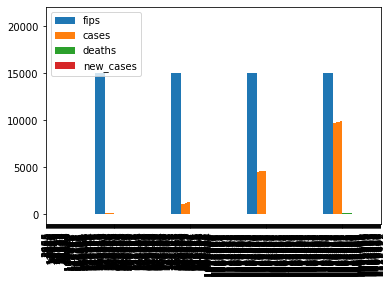

In [19]:
hawaii.plot(kind='bar')

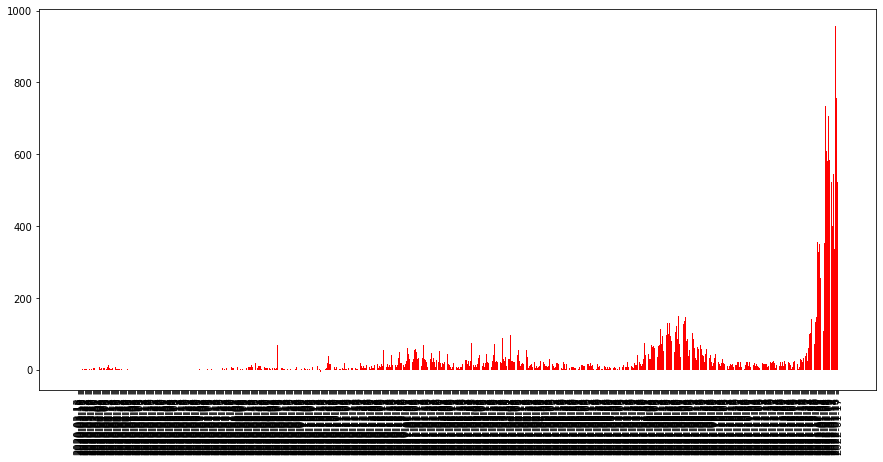

In [20]:
plt.figure(figsize=(15,7))
plt.bar(x=hawaii_dates, height=hawaii_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

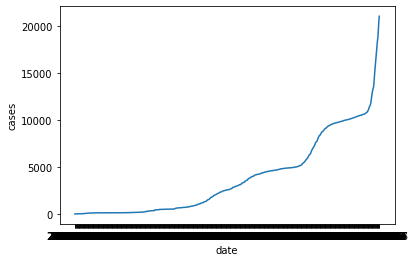

In [28]:
plot = sns.lineplot(data = hawaii, x = 'date' , y = 'cases')


# Task4: Understand Hawaii covid 19 data in last 30 days

> Indented block



In [29]:
hawaii_cases_30 =hawaii['cases'][-31:-1]
hawaii_deaths_30 = hawaii['deaths'] [-31:-1]
hawaii_dates_30 = hawaii['date'][-31:-1]
hawaii_new_cases_30 =hawaii['new_cases'][-31:-1]

In [32]:
hawaii_dates_30.head(10)

2025166    2021-12-18
2028417    2021-12-19
2031668    2021-12-20
2034918    2021-12-21
2038168    2021-12-22
2041418    2021-12-23
2044667    2021-12-24
2047917    2021-12-25
2051167    2021-12-26
2054417    2021-12-27
Name: date, dtype: object

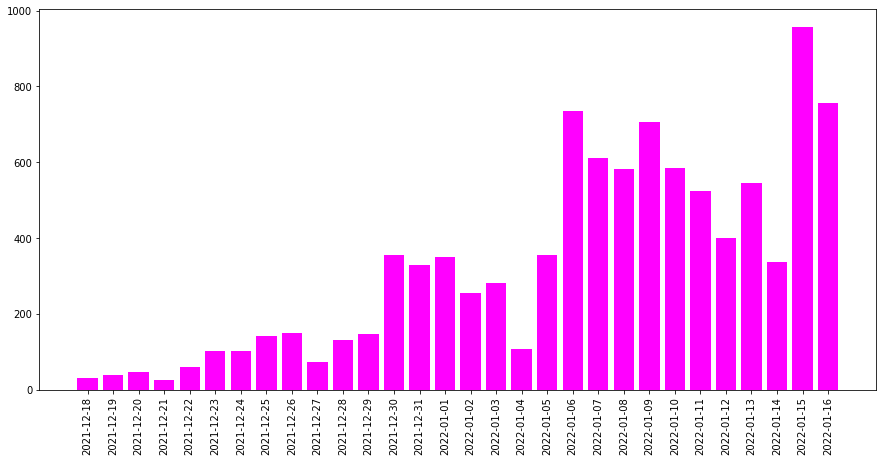

In [37]:
plt.figure(figsize=(15,7))
plt.bar(x=hawaii_dates_30, height=hawaii_new_cases_30, color='magenta')
plt.xticks(rotation=90)
plt.show()

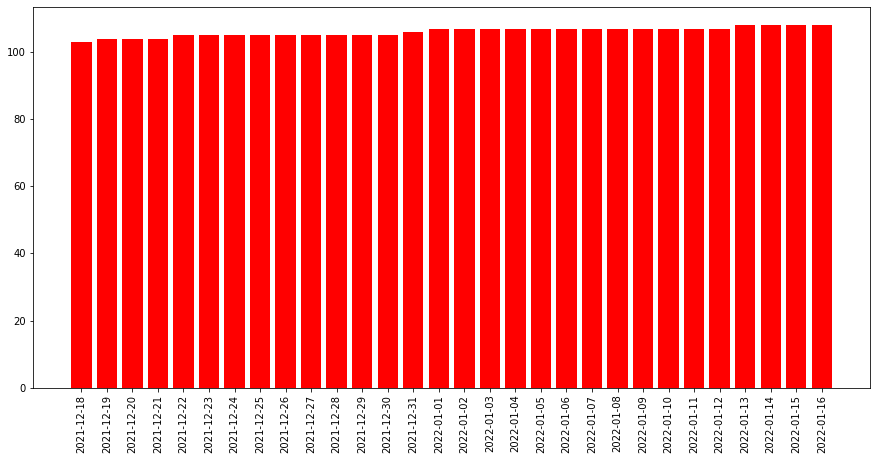

In [38]:
plt.figure(figsize=(15,7))
plt.bar(x=hawaii_dates_30, height=hawaii_deaths_30, color='red')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

In [39]:
states = ['New York', 'California','Florida', 'Texas','Hawaii']

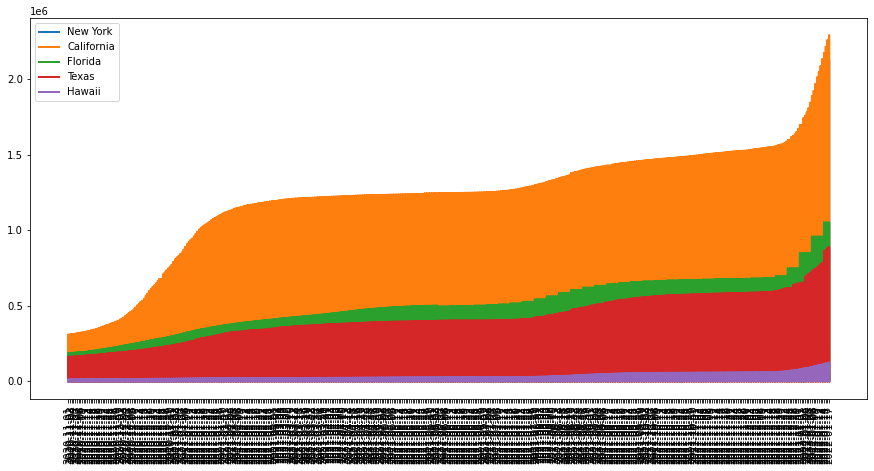

In [50]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()

# Conclusion

Below are the conclusions:



1.   Conclusion 1
     -- Some graphs have shown that cases in Maui have risen since the beginning of 2022.
2.   Conclusion 2
     --Though cases have risen in Hawaii, other states are experiencing more numbers

